In [1]:
using JLD, PyPlot

In [98]:
archivo="../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_5.jld"

"../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_5.jld"

In [99]:
Arxivo=load(archivo)

Dict{String,Any} with 5 entries:
  "Canalesrespuesta" => Set(Array{Int64,1}[[51,31],[47,24],[50,29],[40,18],[39,…
  "LFPTotal"         => [-4122.99 -36.2549 … -22.1558 38.269; -4.02832 6.04248 …
  "CSDLindenberg"    => [-1.35837 -9.721 … -10.6049 22.9083; 0.174777 -3.23132 …
  "freq"             => 7.02206
  "CanalesSaturados" => Set(Array{Int64,1}[[45,9],[53,13],[15,49],[1,1],[44,36]…

In [100]:
#nota=Arxivo["Nota"]

In [101]:
CSD=Arxivo["CSDLindenberg"];
LFP=Arxivo["LFPTotal"];
#KOp=Arxivo["KTT_KInv"];

In [102]:
(alto,ancho,tmax)=size(CSD)

(64,64,2001)

In [103]:
satu=length(Arxivo["CanalesSaturados"])

16

In [104]:
listonga=(135,139,149)   

(135,139,149)

In [105]:
freq=Arxivo["freq"]
#retrazo=Arxivo["retrazo"]

7.022058198545425

In [106]:
retrazo=0

0

In [107]:
Arxivo["Nota"]

LoadError: KeyError: key "Nota" not found

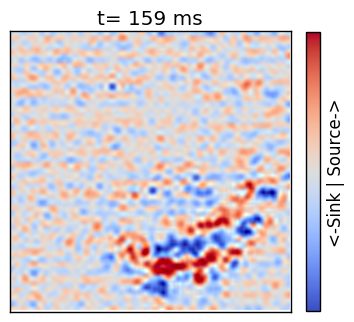

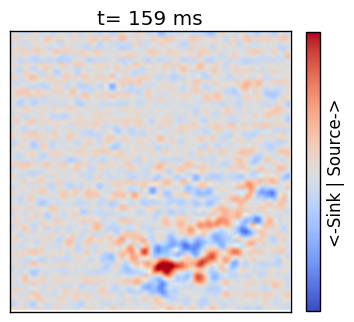

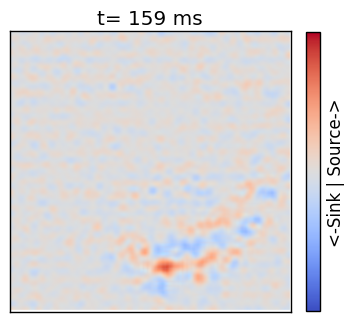

In [108]:
t=1114
#ion()
ioff()
lista=(25,50,100)
for limites in lista
figure(figsize=(4,4))
    xlim(0,65)
    ylim(65,0)

    ejemplo=CSD[:,:,t]
    tiempo=round(Int,(t-retrazo)/freq)

tick_params(
    axis="both",          # changes apply to the x-axis
    which="both",      # both major and minor ticks are affected
    bottom="off",      # ticks along the bottom edge are off
    top="off",
    right="off",
    left="off",
# ticks along the top edge are off
    labelbottom="off",
    labelleft="off")

    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation="sinc",
    cmap="coolwarm", 
                      vmin=-limites,vmax=limites, extent=[64.5,0,0.5,64.5])

cbx=colorbar(imagen, fraction=0.045, ticks=[]) 

cbx[:set_label]("<-Sink | Source->")
end

In [111]:
ioff()
limites=50
inicio=1000
retrazo=inicio
final=1500
for t=inicio:7:final
#t=954
    figura=figure(figsize=(4,4))
    xlim(0,65)
    ylim(65,0)

    ejemplo=CSD[:,:,t]
    tiempo=round(Int,(t-retrazo)/freq)
    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation="sinc",
                  cmap="coolwarm", 
                  vmin=-limites,vmax=limites, extent=[64.5,0.5,0.5,64.5])

   cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
   cbx[:set_label]("<-Sink | Source->")
    savefig("CSDDifferenceSmooth_180116s1_05_$t.svg",dpi=90)
    close(figura)
end
PyPlot.close_figs()

In [ ]:
bchica=readdlm("../kCSD/BceroDura-r-0.0675.dat")
btchica=readdlm("../kCSD/BtildeceroDura-r-0.0675.dat");

In [ ]:
aver=imshow(bchica,interpolation="nearest", cmap="gnuplot")
cbx=colorbar(aver)

In [ ]:
bgrande=readdlm("../kCSD/BceroDura-r-0.25.dat")
btgrande=readdlm("../kCSD/BtildeceroDura-r-0.25.dat");

In [ ]:
aver=imshow(b,interpolation="nearest", cmap="gnuplot")
cbx=colorbar(aver)

In [ ]:
size(bgrande)
tu=vec(bgrande[64,:])
te=vec(bchica[64,:])

In [ ]:
plot(1:127,tu)
plot(1:127,te)

In [ ]:
bgmin=bgrande/minimum(bgrande)

In [ ]:
cloack=bgmin-brmin

In [ ]:
imshow(cloack,cmap="gnuplot",interpolation="none")
colorbar()

In [ ]:
xlim(0,65)
ylim(0,65)
imshow(KOp,cmap="gnuplot", vmin=-1,vmax=1)
colorbar()

In [ ]:
KOp[1:64,1:64]